In [33]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("../Dataset.csv")
data = data.drop('Name', axis = 1)

x = data.drop('Emotion', axis = 1)
y = data['Emotion']

scaler = MinMaxScaler(feature_range = (0, 1))
xRescaled = scaler.fit_transform(x)
x = pd.DataFrame(data = xRescaled, columns = x.columns)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

dataTrain, dataTest, classTrain, classTest = train_test_split(x, y, test_size = 0.2, random_state = 123)

mlp = MLPClassifier(solver = 'sgd', random_state = 123, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, \
                    hidden_layer_sizes = (100,50,), max_iter = 1400, learning_rate = 'adaptive')

mlp.fit(dataTrain, classTrain)

predTrain = mlp.predict(dataTrain)
predTest = mlp.predict(dataTest)

Confusion Matrix for Training Set:


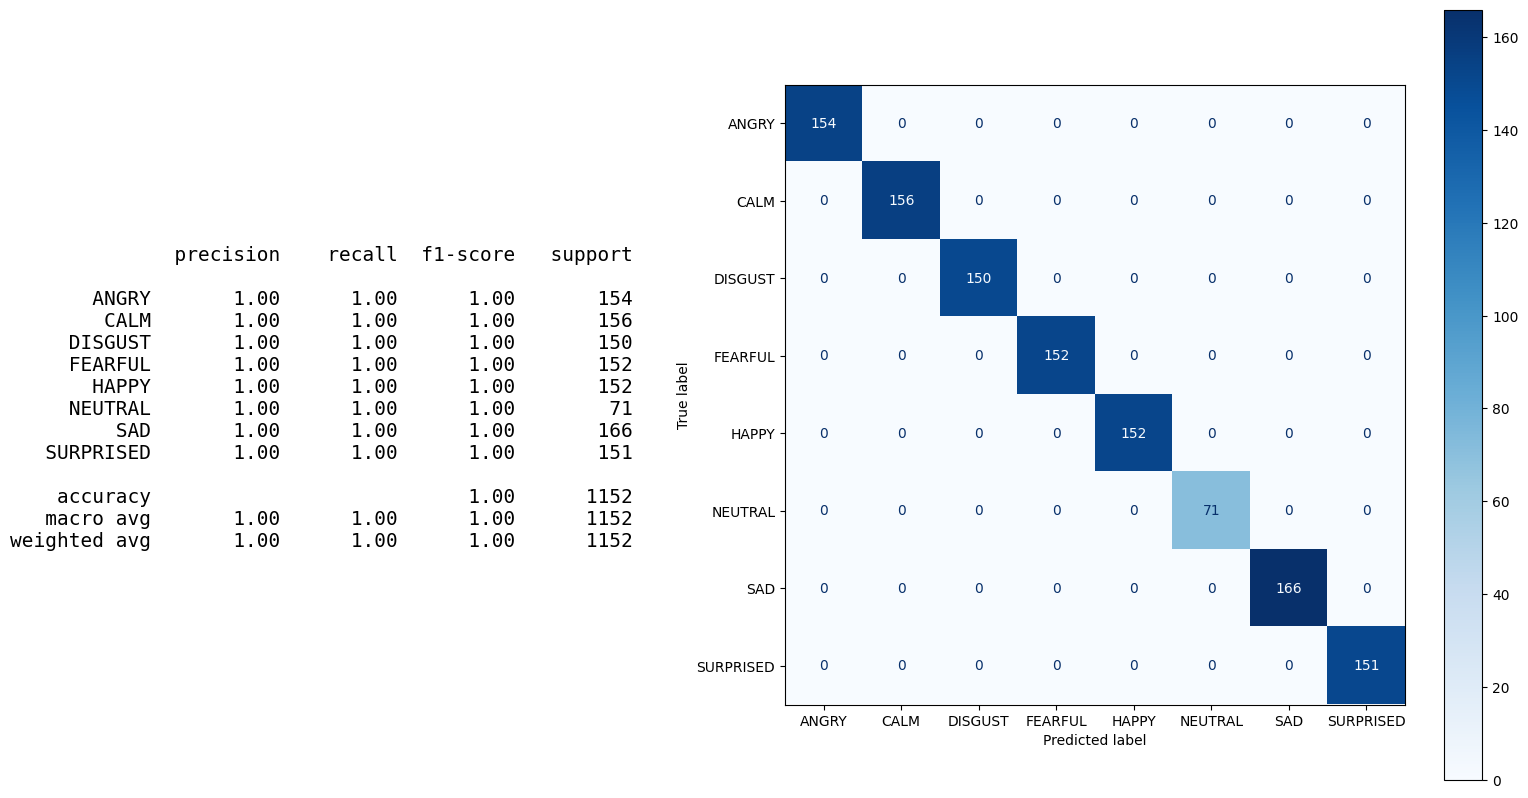

In [35]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

print("Confusion Matrix for Training Set:")

disp = ConfusionMatrixDisplay.from_predictions(classTrain, predTrain, display_labels = mlp.classes_, cmap = plt.cm.Blues)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)
mono = {'family' : 'monospace'}
cr = classification_report(classTrain, predTrain, zero_division = 0, target_names = mlp.classes_)
plt.text(-10.5, 5.75, cr, fontdict = mono, fontsize = 14)
plt.show()

Confusion Matrix for Test Set:


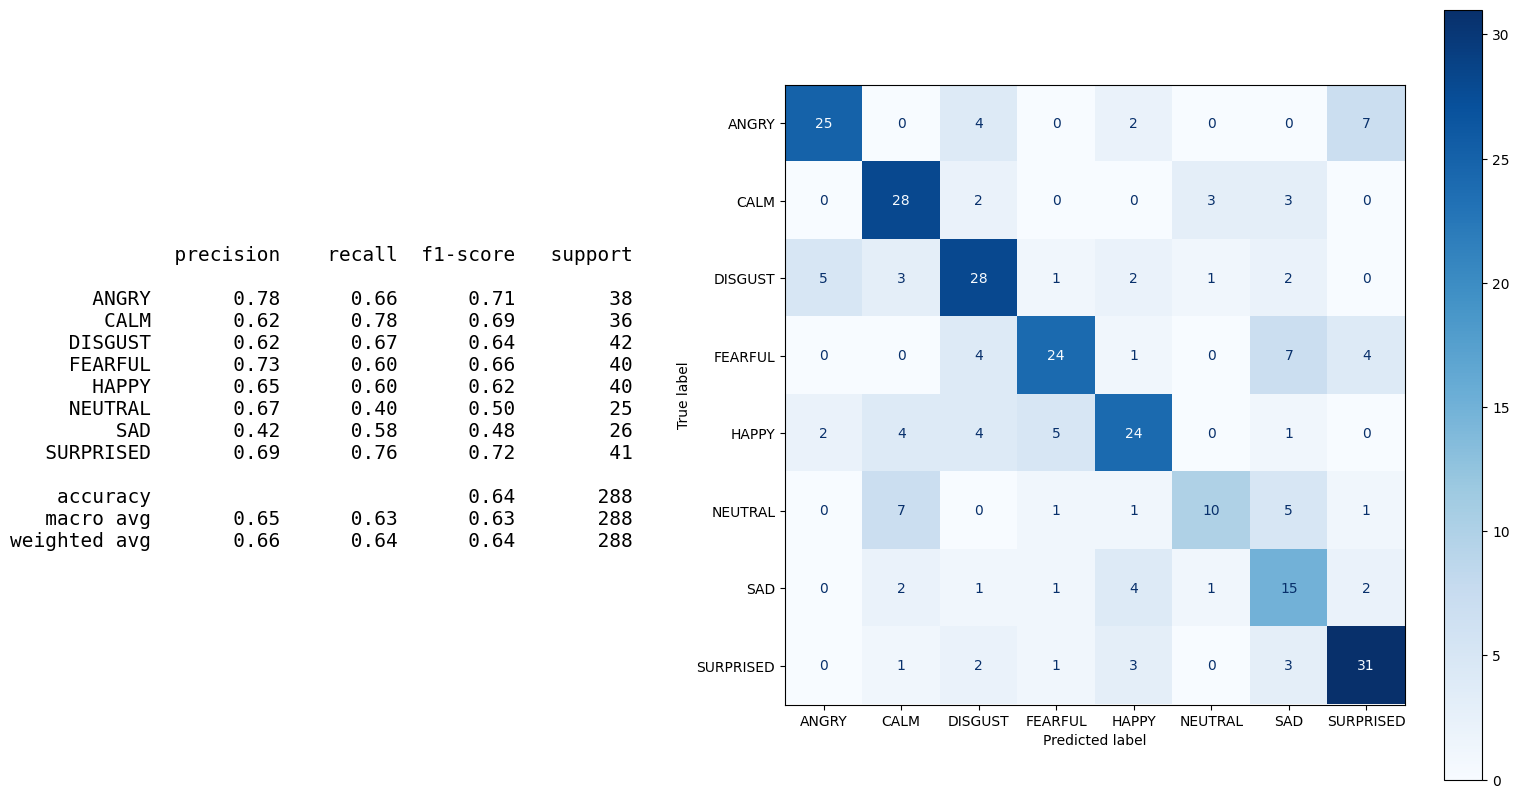

In [36]:
print("Confusion Matrix for Test Set:")

disp = ConfusionMatrixDisplay.from_predictions(classTest, predTest, display_labels = mlp.classes_, cmap = plt.cm.Blues)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)
mono = {'family' : 'monospace'}
cr = classification_report(classTest, predTest, zero_division = 0, target_names = mlp.classes_)
plt.text(-10.5, 5.75, cr, fontdict = mono, fontsize = 14)
plt.show()

In [37]:
from sklearn.pipeline import Pipeline
from joblib import dump

model = Pipeline([('scaler', scaler), ('mlp', mlp)])
dump(model, "../Raw Models/ANN.joblib")

['../Raw Models/ANN.joblib']